In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import mglearn
import random

In [2]:
df = pd.read_csv("./data/breast-cancer.data", header=None)
df = df.rename(columns={
    0: "Label", 
    1: "Age", 
    2: "Menopause",
    3: "Tumor Size",
    4: "Inv Nodes",
    5: "Node Caps",
    6: "Malignance Degree",
    7: "Breast",
    8: "Breast Quadrant",
    9: "Irradiated"
})
df.head(15)

,Label,Age,Menopause,Tumor Size,Inv Nodes,Node Caps,Malignance Degree,Breast,Breast Quadrant,Irradiated
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [3]:
df = df[df["Breast Quadrant"] != "?"]
df = df[df["Node Caps"] != "?"]


def get_label(label):
    if label == "no-recurrence-events":
        return 1
    return 0


def get_age(age_range):
    return int(age_range.split("-")[0])


def get_menopause(menopause):
    if menopause == "premeno":
        return 1
    elif menopause == "ge40":
        return 2
    else:
        return 3


def get_tumor_size(size_range):
    return int(size_range.split("-")[1])


def get_inv_nodes(inv_range):
    return int(inv_range.split("-")[1])
    
    
def get_node_caps(caps):
    if caps == "yes":
        return 1
    else:
        return 0
    

def get_breast(breast):
    if breast == "left":
        return 1
    else:
        return 0
    

def get_breast_quad(quad):
    if quad == "left_low":
        return 1
    elif quad == "left_up":
        return 2
    elif quad == "right_low":
        return 3
    elif quad == "right_up":
        return 4
    else:
        return 5
    
    
def get_irradiated(irr):
    if irr == "yes":
        return 1
    else:
        return 0

    
df["Label"] = df["Label"].apply(lambda x: get_label(x))
df["Age"] = df["Age"].apply(lambda x: get_age(x))
df["Menopause"] = df["Menopause"].apply(lambda x: get_menopause(x))
df["Tumor Size"] = df["Tumor Size"].apply(lambda x: get_tumor_size(x))
df["Inv Nodes"] = df["Inv Nodes"].apply(lambda x: get_inv_nodes(x))
df["Node Caps"] = df["Node Caps"].apply(lambda x: get_node_caps(x))
df["Breast"] = df["Breast"].apply(lambda x: get_breast(x))
df["Breast Quadrant"] = df["Breast Quadrant"].apply(lambda x: get_breast(x))
df["Irradiated"] = df["Irradiated"].apply(lambda x: get_irradiated(x))
df.head(15)

,Label,Age,Menopause,Tumor Size,Inv Nodes,Node Caps,Malignance Degree,Breast,Breast Quadrant,Irradiated
0,1,30,1,34,2,0,3,1,0,0
1,1,40,1,24,2,0,2,0,0,0
2,1,40,1,24,2,0,2,1,0,0
3,1,60,2,19,2,0,2,0,0,0
4,1,40,1,4,2,0,2,0,0,0
5,1,60,2,19,2,0,2,1,0,0
6,1,50,1,29,2,0,2,1,0,0
7,1,60,2,24,2,0,1,1,0,0
8,1,40,1,54,2,0,2,1,0,0
9,1,40,1,24,2,0,2,0,0,0


In [4]:
df_X = df.drop("Label", axis=1)
df_y = df["Label"]
X, y = df_X.to_numpy(), df_y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_y, random_state=42)
X_train.shape

(207, 9)

In [60]:
def train_and_validate(depth=1, seed=42):
    forest = RandomForestClassifier(n_estimators=5, random_state=seed, max_depth=depth)
    forest.fit(X_train, y_train)

    y_pred = forest.predict(X_test)
    total = X_test.shape[0]
    accuracy = (100 * ((y_test == y_pred).sum() / total))
    return accuracy

In [113]:
accuracies = [train_and_validate(depth=i) for i in range(1, 11)]

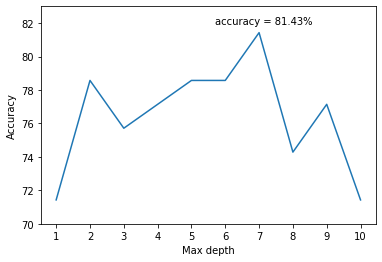

In [114]:
x_values = [i for i in range(1, 11)]
accuracy_max = max(accuracies)
x_pos = accuracies.index(accuracy_max)
x_max = x_values[x_pos]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_values, accuracies)
plt.xticks(x_values)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
ax.set_ylim(70, 83)

ax.annotate(f'accuracy = {accuracy_max:.2f}%', xy=(x_max, accuracy_max), xytext=(x_max - 1.3, accuracy_max + 0.5))

# plt.savefig("./images/rf_accuracies")
plt.show()

In [126]:
main_list = []
random_state = [random.randint(2, 50) for i in range(8)]
print(random_state)

for seed in random_state:
    outer_loop = []
    for depth in range(1, 11):
        outer_loop.append(train_and_validate(depth=depth, seed=seed))
    main_list.append(outer_loop)

[9, 24, 34, 46, 42, 13, 25, 31]


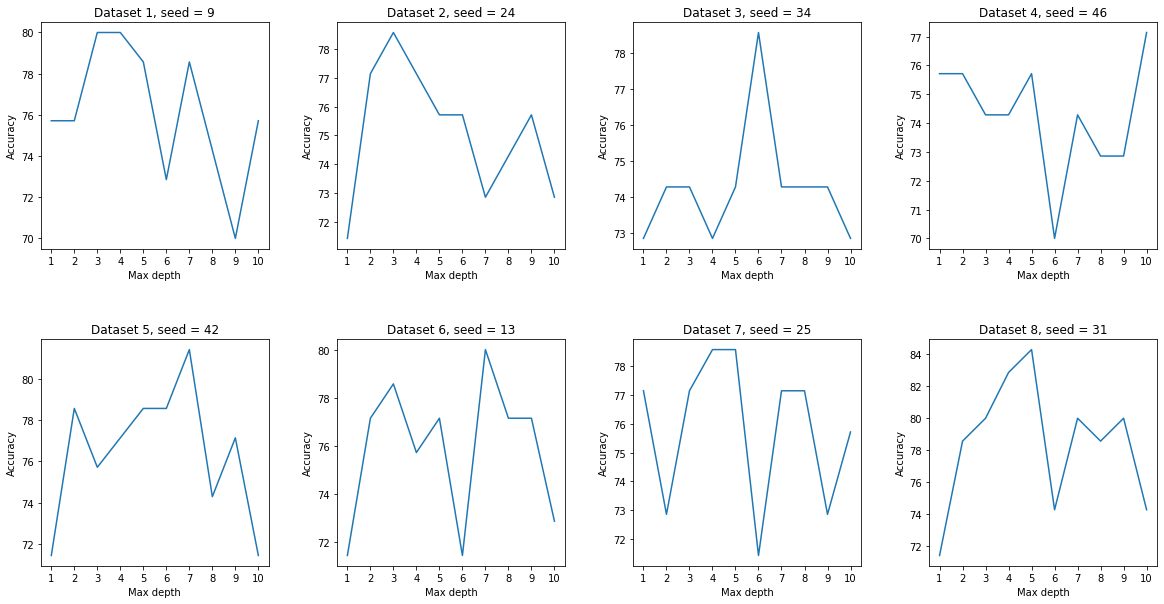

In [131]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

a = 0
for i in range(2):
    for j in range(4):
        axes[i, j].plot(x_values, main_list[a])
        axes[i, j].set_title(f"Dataset {a + 1}, seed = {random_state[a]}")
        axes[i, j].set_xticks(x_values)
        axes[i, j].set_xlabel("Max depth")
        axes[i, j].set_ylabel("Accuracy")
        a = a + 1

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig("./images/rf_accuracies_8_datasets")
plt.show()

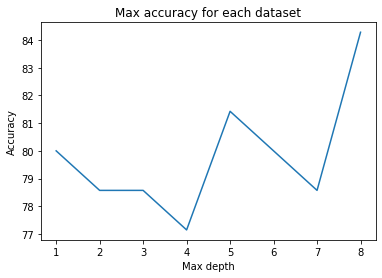

84.28571428571429

In [132]:
max_accuracies = [max(acc) for acc in main_list]

plt.plot(x_values[:8], max_accuracies)
plt.xticks(x_values[:8])
plt.ylabel("Accuracy")
plt.xlabel("Max depth")
plt.title("Max accuracy for each dataset")
plt.show()

max(max_accuracies)

In [64]:
#fig, axes = plt.subplots(2, 3, figsize=(20, 10))
#for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
#    ax.set_title(f"Tree {i}")
#    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
#
#mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
#axes[-1, -1].set_title("Random Forest")
#mglearn.discrete_scatter(X_train[:, 0], X_train[:, -1], y_train)